In [23]:
import networkx as nx
import os
import pandas as pd

In [24]:
xls = pd.ExcelFile('graph.xlsx')
stands = pd.read_excel(xls,'stands')
stands.shape

(167, 3)

In [25]:
sorted(stands['From'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166]

In [26]:
xls = pd.ExcelFile('graph.xlsx')
t_points_runways = pd.read_excel(xls,'ts2')
t_points_runways.head(20)

From        To  Distance
0    T2        T7       500
1    T1        T2       400
2    T3        T8       350
3    T8        T9       300
4    T9       T10       200
5   T10       T11       300
6    T3        T4       250
7    T4        T5       250
8    T5        T6       150
9    T2        T5       300
10   T7       T14      1000
11   T6       T12       350
12  T14  RUNWAY_2       100
13  T14  RUNWAY_1       250
14  T12       T15       500
15   T6  RUNWAY_4       100
16  T15  RUNWAY_3       250
17   T1       T16       400
18  T16        T3       250
19  T16        T4       250

In [27]:
# Create graph
G = nx.DiGraph()

In [28]:
#add stands nodes
for i in range(len(stands)):
    G.add_node(str(stands.iloc[i,0]))

In [29]:
#creating turning points and runways
Ts = ['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T14','T15','T16']
Rs = ['RUNWAY_1','RUNWAY_2','RUNWAY_3','RUNWAY_4']

In [30]:
#adding turning points and runways as nodes
for t in Ts:
    G.add_node(t)
for r in Rs:
    G.add_node(r)

In [31]:
#G.add_egde('T1','T3',weight=130)
#G.add_edge('T1','T2',weight=80)
#G.add_edge('T10','T11',weight = 60)
#G.add_edge('T11','T12',weight=40)
#G.add_edge('T11','T4',weight=100)
#G.add_edge('T12','T15',weight=100)
#G.add_edge('T14','R2',weight=20)
#G.add_edge('T15','R3',weight=50)
#G.add_edge('T2','T5',weight=60)
#G.add_edge('T2','T4',weight = )

In [32]:
#creating connections stands and turning points with distance as weight
for i in range(len(stands)):
    G.add_edge(str(stands.iloc[i,0]),str(stands.iloc[i,1]),weight=stands.iloc[i,2])
    G.add_edge(str(stands.iloc[i,1]),str(stands.iloc[i,0]),weight=stands.iloc[i,2])

In [33]:
#creating connections turning points and runways with distance as weight
for i in range(len(t_points_runways)):
    G.add_edge(str(t_points_runways.iloc[i,0]),str(t_points_runways.iloc[i,1]),weight=t_points_runways.iloc[i,2])
    G.add_edge(str(t_points_runways.iloc[i,1]),str(t_points_runways.iloc[i,0]),weight=t_points_runways.iloc[i,2])

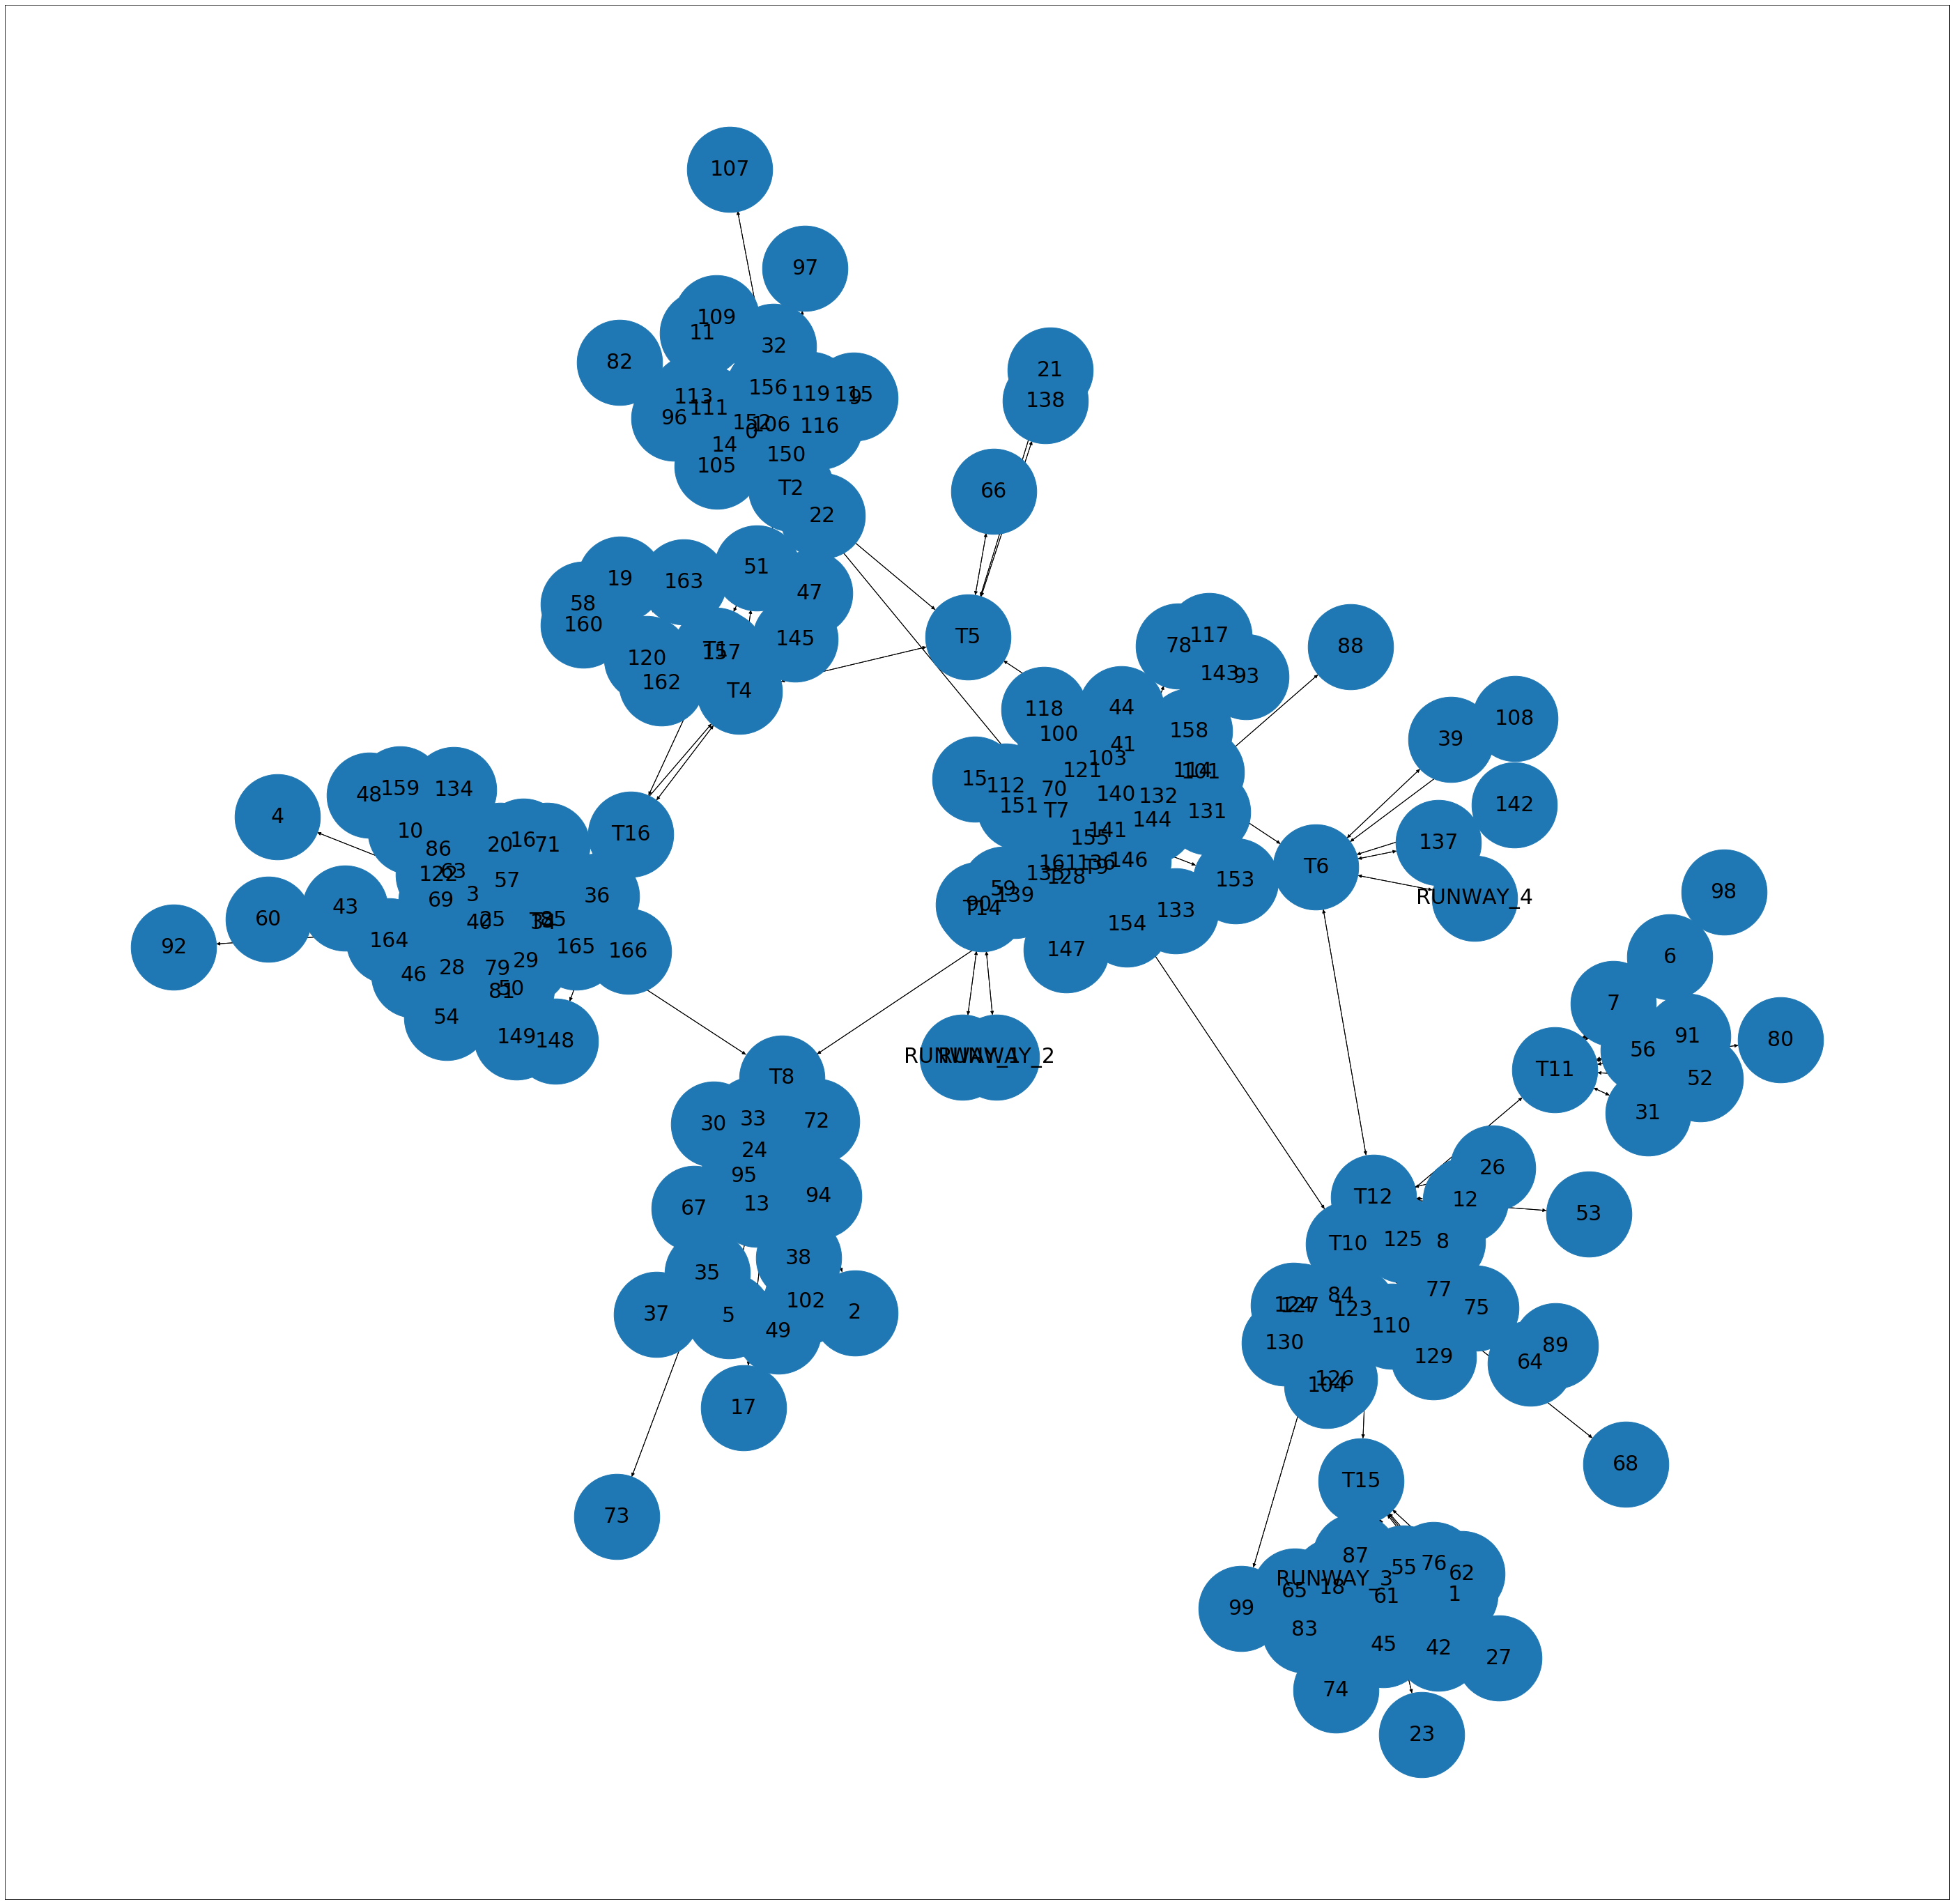

In [34]:
import matplotlib.pyplot as plt
plt.figure(3,figsize=(50,50)) 
nx.draw_networkx(G, pos = nx.spring_layout(G, k=0.07, iterations=20),with_labels=True,node_size=15000,font_size=30)
plt.show()

In [49]:
nx.shortest_path(G,source='3',target='RUNWAY_4',weight='string')

['3', 'T3', 'T4', 'T5', 'T6', 'RUNWAY_4']

In [37]:
nx.shortest_path_length(G, source='35', target='RUNWAY_1', weight='string', method='dijkstra')

8

In [38]:
nx.Graph.get_edge_data(G,u='35',v='T8', default=None)

{'weight': 130}

In [39]:
nx.dijkstra_path_length(G, source='35', target='RUNWAY_1', weight='weight')

3030

In [40]:
print(nx.dijkstra_path_length(G, source='138', target='RUNWAY_1', weight='weight'))
print(nx.dijkstra_path_length(G, source='138', target='RUNWAY_2', weight='weight'))
print(nx.dijkstra_path_length(G, source='138', target='RUNWAY_3', weight='weight'))
print(nx.dijkstra_path_length(G, source='138', target='RUNWAY_4', weight='weight'))

2150
2000
1350
350


### Get all the distances

In [43]:
Runways = ['RUNWAY_1','RUNWAY_2','RUNWAY_3','RUNWAY_4']

line = []

for run in Runways:
    for stand in range(166):
            line.append(['STAND_'+str(stand),run,nx.dijkstra_path_length(G, source=str(stand), target=run, weight='weight')])

In [44]:
line

[['STAND_0', 'RUNWAY_1', 2100],
 ['STAND_1', 'RUNWAY_1', 3250],
 ['STAND_2', 'RUNWAY_1', 2975],
 ['STAND_3', 'RUNWAY_1', 2935],
 ['STAND_4', 'RUNWAY_1', 2600],
 ['STAND_5', 'RUNWAY_1', 3000],
 ['STAND_6', 'RUNWAY_1', 3800],
 ['STAND_7', 'RUNWAY_1', 3900],
 ['STAND_8', 'RUNWAY_1', 3575],
 ['STAND_9', 'RUNWAY_1', 2025],
 ['STAND_10', 'RUNWAY_1', 2735],
 ['STAND_11', 'RUNWAY_1', 1875],
 ['STAND_12', 'RUNWAY_1', 2800],
 ['STAND_13', 'RUNWAY_1', 3250],
 ['STAND_14', 'RUNWAY_1', 2065],
 ['STAND_15', 'RUNWAY_1', 3350],
 ['STAND_16', 'RUNWAY_1', 3175],
 ['STAND_17', 'RUNWAY_1', 2950],
 ['STAND_18', 'RUNWAY_1', 3300],
 ['STAND_19', 'RUNWAY_1', 2400],
 ['STAND_20', 'RUNWAY_1', 3015],
 ['STAND_21', 'RUNWAY_1', 2100],
 ['STAND_22', 'RUNWAY_1', 2350],
 ['STAND_23', 'RUNWAY_1', 3150],
 ['STAND_24', 'RUNWAY_1', 3140],
 ['STAND_25', 'RUNWAY_1', 3135],
 ['STAND_26', 'RUNWAY_1', 2750],
 ['STAND_27', 'RUNWAY_1', 3150],
 ['STAND_28', 'RUNWAY_1', 2855],
 ['STAND_29', 'RUNWAY_1', 3055],
 ['STAND_30', 'RUNWA

In [45]:
pairs_data = pd.DataFrame(line)

In [46]:
pairs_data

0         1     2
0      STAND_0  RUNWAY_1  2100
1      STAND_1  RUNWAY_1  3250
2      STAND_2  RUNWAY_1  2975
3      STAND_3  RUNWAY_1  2935
4      STAND_4  RUNWAY_1  2600
..         ...       ...   ...
659  STAND_161  RUNWAY_4  1525
660  STAND_162  RUNWAY_4   750
661  STAND_163  RUNWAY_4   600
662  STAND_164  RUNWAY_4   875
663  STAND_165  RUNWAY_4  1190

[664 rows x 3 columns]

In [47]:
pairs_data.to_csv('new_pairs.csv')